In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime as dt

In [19]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 1, 1)

df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


In [21]:
df = df.reset_index()

In [22]:
df = df.drop(columns=['Date', 'Adj Close'])

In [23]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


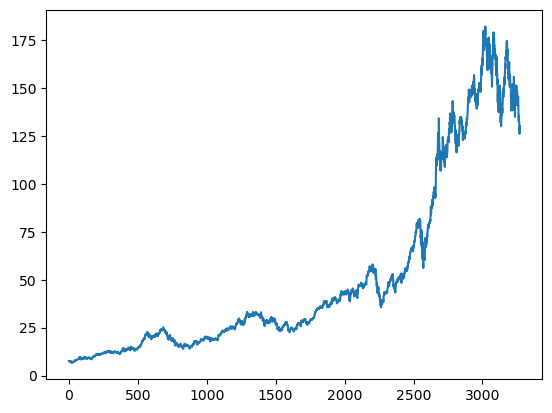

In [24]:
plt.plot(df.Close)

In [26]:
ma100 = df.Close.rolling(100).mean()

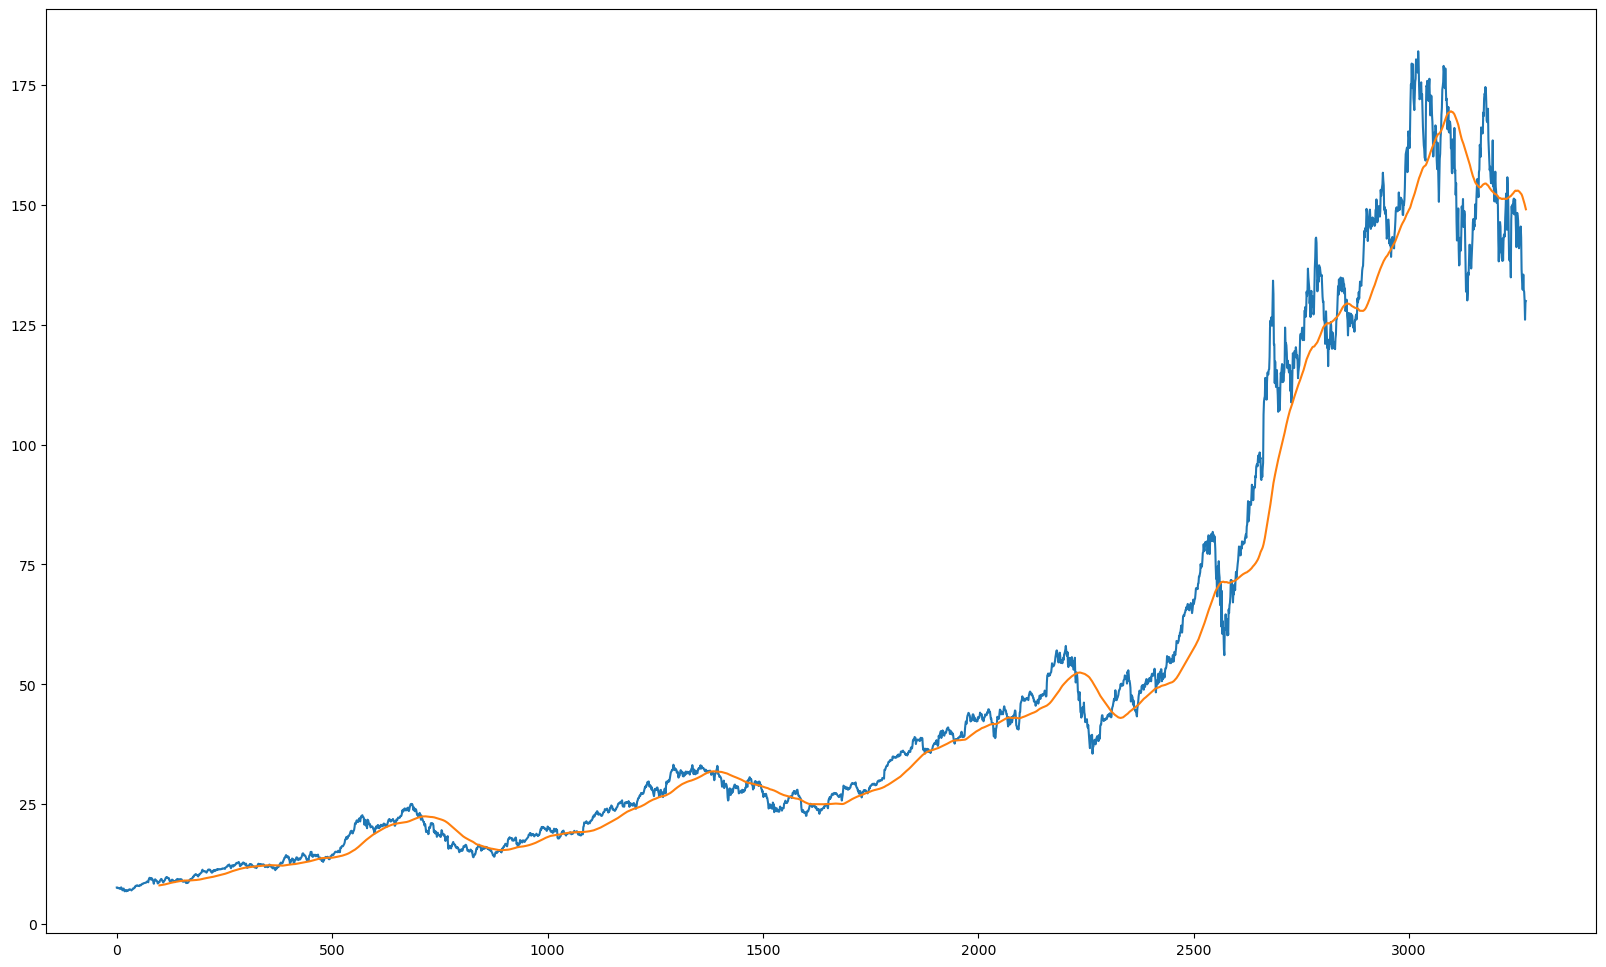

In [28]:
plt.figure(figsize=(20,12))
plt.plot(df.Close)
plt.plot(ma100)

In [29]:
ma200 = df.Close.rolling(200).mean()

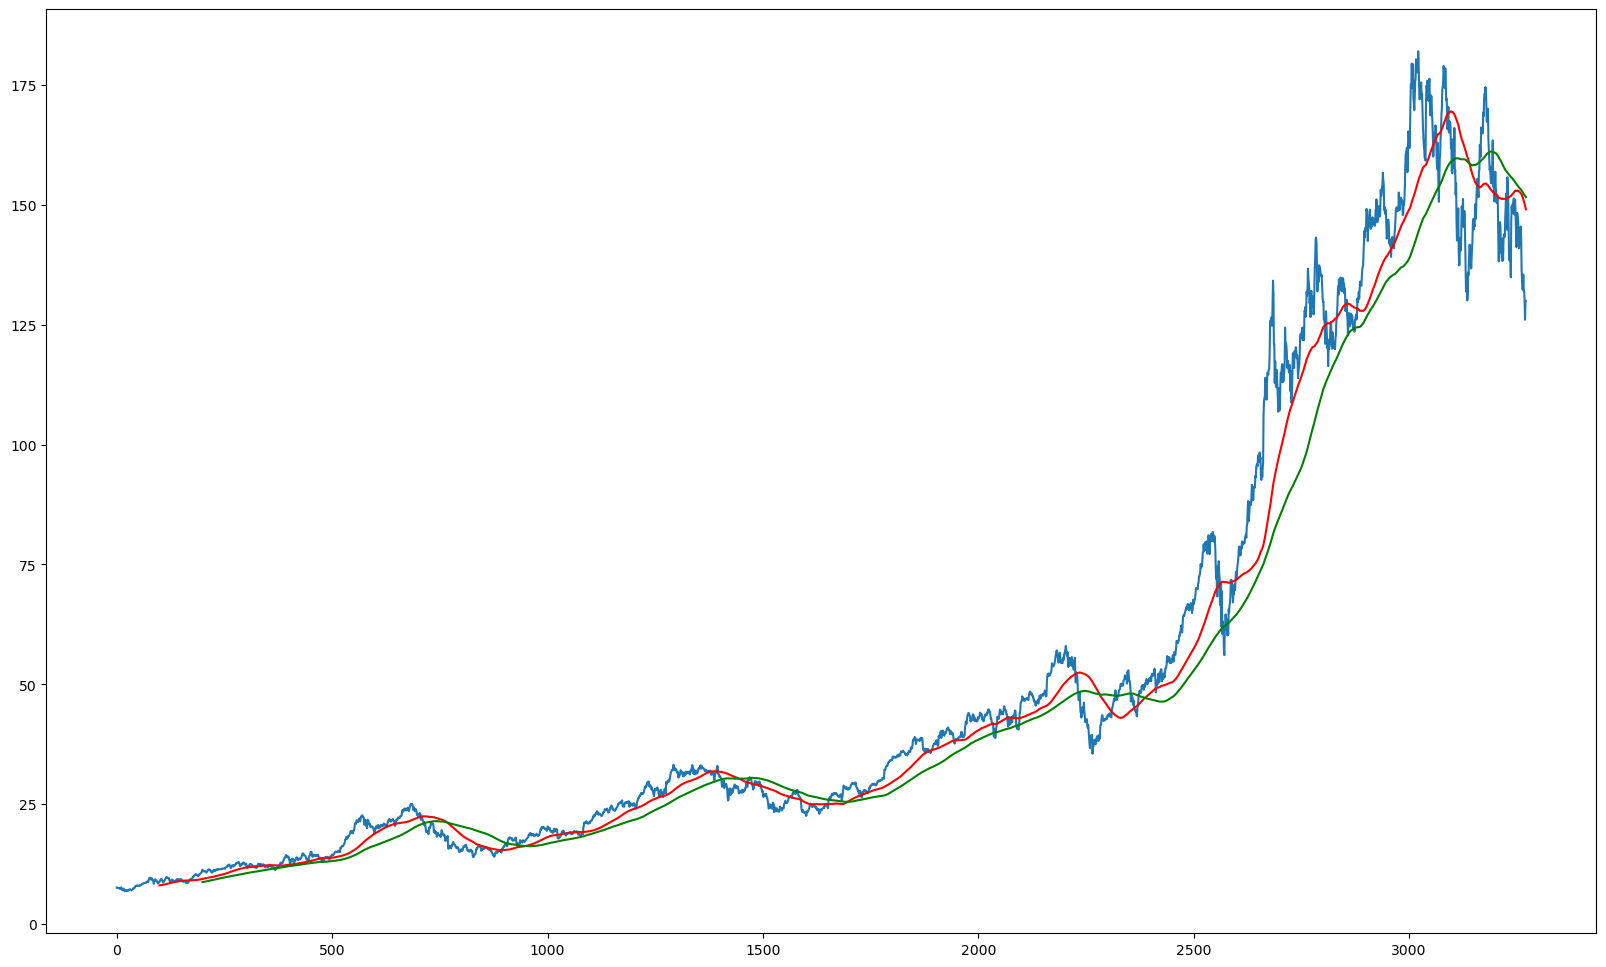

In [30]:
plt.figure(figsize=(20,12))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [31]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)
data_testing_array = scaler.fit_transform(data_testing)

In [41]:
data_training_array.shape

(2290, 1)

In [56]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)    

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [58]:
x_train.shape


(2190, 100, 1)

In [59]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [62]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 51s 572ms/step - loss: 0.0310
Epoch 2/50
69/69 [==============================] - 37s 539ms/step - loss: 0.0074
Epoch 3/50
69/69 [==============================] - 39s 563ms/step - loss: 0.0065
Epoch 4/50
69/69 [==============================] - 40s 586ms/step - loss: 0.0054
Epoch 5/50
69/69 [==============================] - 43s 625ms/step - loss: 0.0051
Epoch 6/50
69/69 [==============================] - 43s 618ms/step - loss: 0.0046
Epoch 7/50
69/69 [==============================] - 41s 593ms/step - loss: 0.0044
Epoch 8/50
69/69 [==============================] - 40s 584ms/step - loss: 0.0051
Epoch 9/50
69/69 [==============================] - 40s 580ms/step - loss: 0.0039
Epoch 10/50
69/69 [==============================] - 40s 582ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 41s 595ms/step - loss: 0.0035
Epoch 12/50
69/69 [==============================] - 41s 585ms/step - loss: 0.0035
Epoch 13/50
6

In [63]:
model.save('keras_model.h5')

In [64]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [65]:
past_100_days = data_training.tail(100)

In [70]:
past_100_days

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [67]:
final_df = past_100_days.append(data_testing, ignore_index= True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_6920\3501726630.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True)


In [69]:
final_df

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500
...,...
1077,131.860001
1078,130.029999
1079,126.040001
1080,129.610001


In [71]:
input_data = scaler.fit_transform(final_df)

In [72]:
input_data.shape

(1082, 1)

In [73]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0 ])

In [74]:
x_test, y_test = np.array(x_test) , np.array(y_test)


In [75]:
x_test.shape

(982, 100, 1)

In [76]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 6s 137ms/step


In [77]:
y_predicted

array([[0.14153865],
       [0.14227611],
       [0.1430778 ],
       [0.14391787],
       [0.14477096],
       [0.14561664],
       [0.14643724],
       [0.14722034],
       [0.14796108],
       [0.14865397],
       [0.14930111],
       [0.14991088],
       [0.15049152],
       [0.15105112],
       [0.15158837],
       [0.15210631],
       [0.15261115],
       [0.15310577],
       [0.15358652],
       [0.15403983],
       [0.15445404],
       [0.15484509],
       [0.15523963],
       [0.15566286],
       [0.1561404 ],
       [0.1566987 ],
       [0.15736079],
       [0.15812935],
       [0.15900148],
       [0.15999451],
       [0.1610983 ],
       [0.16228221],
       [0.16350427],
       [0.164731  ],
       [0.16593505],
       [0.16709861],
       [0.1682136 ],
       [0.16928607],
       [0.17032836],
       [0.1713515 ],
       [0.172367  ],
       [0.17339379],
       [0.17444207],
       [0.17551866],
       [0.17661583],
       [0.17771903],
       [0.17881252],
       [0.179

In [79]:
a = scaler.scale_

In [80]:
scaler_factor = 1/a

In [81]:
scaler_factor

array([146.4624939])

In [82]:
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

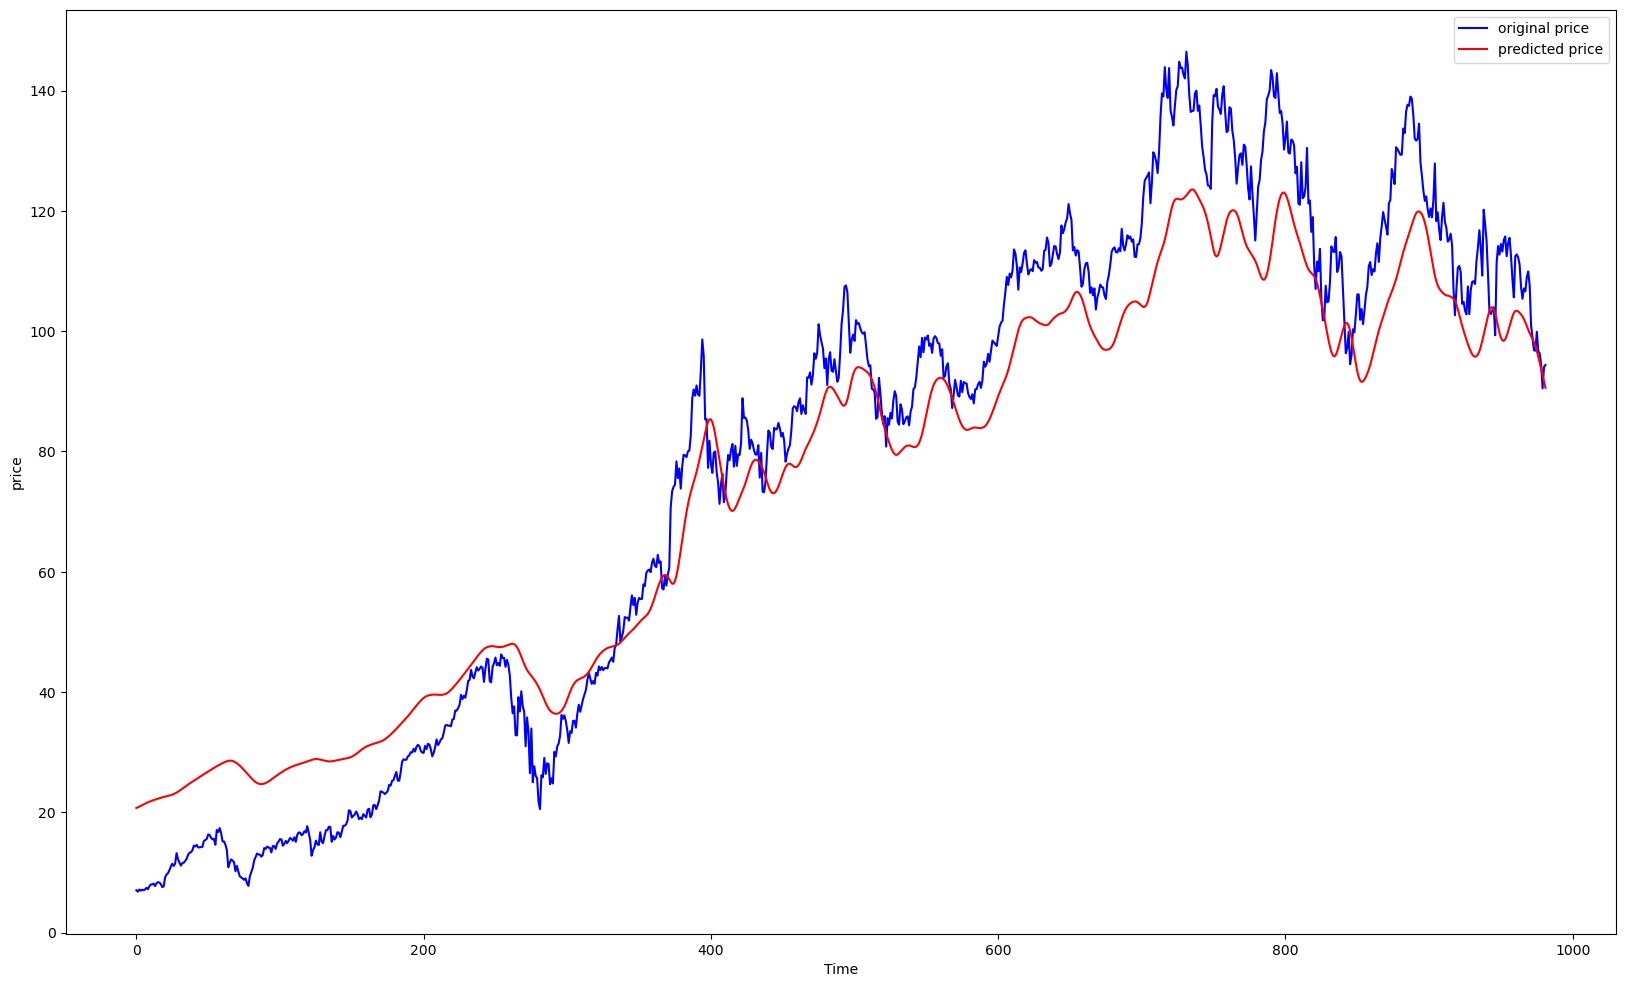

In [83]:
plt.figure(figsize = (20,12))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_predicted, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()